# Домашнее задание №2


Перед вами датасет с данными о вреде курения


Структура данных:

1. **gender**: Пол пациента
2. **age**: Возраст пациента
3. **hypertension**: Наличие гипертонии у пациента 1 - есть, 0 - не наблюдалось
4. **heart_disease**: Наличие у пациента болезней связанных с сердцем 1 - есть, 0 - здоров
5. **ever_married**: Брак - (Состоял в браке/ холост)
6. **work_type**: Работ - Ребенок(children), Госслужащий(Govt_jov), Никогда не работал(Never_worked), Самозанятый(self-employed) или Скрыто(private)
7. **Residence_type**: место работы городская среда(Urban)/удаленка или за городом(Rural)
8. **avg_glucose_level**: средний уровень глюкозы в крови
9. **bmi**: индекс массы тела
10. **smoking_status**: Пациент курит(Иногда, всегда, время от времени или Unknown - неизвестно)
11. **stroke**: Перенесенный инсульт (1 - пациент перенес инсульт, 0 - инсульта не было) - *ваш target*

## Ваша задача

№1 Восстановить целостностью данных, реализовать функцию позволяющие выполнять заполнение данных по среднему или по медианному значению в Series. 

1.  Заполнить пропуски
2.  Убрать дубликаты
3.  Убрать некорректные данные и.т.п.


№2 Построить baseline-модель, попытаться выбить лучший скор (сравнить несколько моделей)

№3 Сделать визуализацию для мини-исследования о вреде курения с разбивкой по половой принадлежности пациентов с помощью pandas, matplotlib, seaborn, plotly и других инструментов.

In [1]:
import requests
import numpy as np 
import pandas as pd

#импортируем библиотеку datetime для работы с датами 
import datetime as dt
from datetime import datetime, date

#Задаем некоторые опции библиотеки pandas, которые настраивают вывод 
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', None)

#импортируем библиотеки matplotlib и seaborn для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [ ]:
def my_fill_na(series, which):
  if which == 1:
     series = series.fillna(series.describe().loc['top']) ## заполнение наиболее часто встречающимся значением
     return
  else :
    print(0)
  
  

In [240]:
url = 'https://drive.google.com/file/d/1He5GI5_Gd8uXYfeETLBISQ5BszX0o4pU/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url,names=['index','gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'])
data = data.drop('index',axis=1)


In [241]:
df = data.copy()

In [242]:
df = df.drop(0)
df = df.drop(1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,NaN,formerly smoked,1
3,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
4,Male,80.0,0.0,1.0,Yes,Private,NaN,105.92,32.5,never smoked,1
5,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
6,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5107,Female,80.0,1.0,0.0,Yes,Private,Urban,83.75,NaN,never smoked,0
5108,Female,81.0,0.0,0.0,Yes,Self-employed,Urban,125.2,40.0,never smoked,0
5109,Female,35.0,0.0,0.0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5110,Male,51.0,0.0,0.0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Чистим gender

In [243]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [244]:
df[df.gender == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3118,Other,26.0,0.0,0.0,No,Private,Rural,143.33,22.4,formerly smoked,0


Видно что мусорная ячейка всего одна, можно просто удалить

In [245]:
df = df.drop(df[df.gender == 'Other'].index)
df.gender.unique()

array(['Male', 'Female'], dtype=object)

## Чистим age

In [246]:
df.age.unique()

array(['67.0', '61.0', '80.0', '49.0', '79.0', '81.0', '74.0', '69.0',
       '59.0', '78.0', '54.0', '50.0', '64.0', '75.0', '60.0', '57.0',
       '71.0', nan, '82.0', '65.0', '58.0', '42.0', '48.0', '72.0',
       '63.0', '76.0', '39.0', '77.0', '73.0', '56.0', '45.0', '70.0',
       '66.0', '52.0', '51.0', '43.0', '68.0', '47.0', '53.0', '38.0',
       '55.0', '1.32', '46.0', '32.0', '14.0', '3.0', '8.0', '37.0',
       '40.0', '35.0', '20.0', '44.0', '25.0', '27.0', '23.0', '17.0',
       '13.0', '4.0', '16.0', '22.0', '30.0', '29.0', '11.0', '21.0',
       '18.0', '33.0', '24.0', '34.0', '36.0', '0.64', '41.0', '0.88',
       '5.0', '26.0', '31.0', '7.0', '12.0', '62.0', '2.0', '9.0', '15.0',
       '28.0', '10.0', '1.8', '0.32', '1.08', '19.0', '6.0', '1.16',
       '1.0', '1.72', '1.4', '0.24', '1.64', '1.56', '0.72', '1.88',
       '1.24', '0.8', '0.4', '0.08', '1.48', '0.56', '0.48', '0.16'],
      dtype=object)

In [247]:
df.age.isna().sum()

143

Поскольку число строк небольшое, и при заполнении нанов средним или медианой может возникнуть ситуация при которой появится объект с возрастом 45 и work_type == children, то просто дропаем

In [248]:
df = df.dropna(subset=['age'])

In [249]:
df.age = df.age.values.astype(float)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [250]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,NaN,formerly smoked,1
3,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
4,Male,80.0,0.0,1.0,Yes,Private,NaN,105.92,32.5,never smoked,1
5,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
6,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5107,Female,80.0,1.0,0.0,Yes,Private,Urban,83.75,NaN,never smoked,0
5108,Female,81.0,0.0,0.0,Yes,Self-employed,Urban,125.2,40.0,never smoked,0
5109,Female,35.0,0.0,0.0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5110,Male,51.0,0.0,0.0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [251]:
save = df.copy()

## Чистим hypertension

In [252]:
df.hypertension.unique()

array(['0.0', '1.0', nan], dtype=object)

In [253]:
df.hypertension.describe()

count     4771
unique       2
top        0.0
freq      4309
Name: hypertension, dtype: object

Видно, что чаще всего встречается 0 (не наблюдалось), можно заполнить наны 0-ём

In [254]:
df.hypertension = df.hypertension.fillna(df.hypertension.describe().loc['top'])
df.hypertension.unique()

array(['0.0', '1.0'], dtype=object)

## Чистим heart_disease

In [255]:
df.heart_disease.unique()

array(['1.0', '0.0', nan], dtype=object)

In [256]:
df[df.heart_disease.isna()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9,Female,69.00,0.0,NaN,No,Private,Urban,94.39,22.8,never smoked,1
13,Female,61.00,0.0,NaN,Yes,Govt_job,Rural,120.46,36.8,smokes,1
14,Female,54.00,0.0,NaN,Yes,Private,Urban,NaN,27.3,smokes,1
16,Female,79.00,0.0,NaN,Yes,Private,NaN,NaN,28.2,never smoked,1
37,Female,82.00,1.0,NaN,No,Private,Rural,NaN,26.5,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5070,Male,80.00,0.0,NaN,Yes,Self-employed,Urban,NaN,24.3,formerly smoked,0
5085,Female,19.00,0.0,NaN,No,Private,Urban,NaN,24.2,Unknown,0
5091,Female,0.72,0.0,NaN,No,children,NaN,NaN,16.8,Unknown,0
5096,Male,13.00,0.0,NaN,No,children,Urban,82.38,24.3,Unknown,0


Слишком много объектов для удаления, придется чем-то заполнять

In [257]:
df.heart_disease.describe()

count     4165
unique       2
top        0.0
freq      3940
Name: heart_disease, dtype: object

In [258]:
df.heart_disease = df.heart_disease.fillna(df.heart_disease.describe().loc['top'])
df.heart_disease.unique()

array(['1.0', '0.0'], dtype=object)

## ever_married

In [259]:
df.ever_married.unique()

array(['Yes', 'No'], dtype=object)

Все впорядке, идём дальше

## work_type

In [260]:
df.work_type.unique()

array(['Private', 'Self-employed', nan, 'Govt_job', 'children',
       'Never_worked'], dtype=object)

In [261]:
df[df.work_type.isna()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,Male,74.00,1.0,1.0,Yes,NaN,Rural,70.09,NaN,never smoked,1
18,Male,64.00,0.0,1.0,Yes,NaN,Urban,191.61,NaN,smokes,1
28,Female,65.00,0.0,0.0,Yes,NaN,NaN,100.98,NaN,formerly smoked,1
55,Female,77.00,1.0,0.0,Yes,NaN,Urban,124.13,NaN,never smoked,1
73,Female,67.00,1.0,0.0,Yes,NaN,Rural,179.12,NaN,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5026,Male,33.00,0.0,0.0,Yes,NaN,Rural,153.34,NaN,never smoked,0
5034,Female,1.24,0.0,0.0,No,NaN,Rural,61.94,NaN,Unknown,0
5065,Male,39.00,0.0,0.0,Yes,NaN,NaN,179.38,NaN,Unknown,0
5073,Male,81.00,0.0,0.0,Yes,NaN,NaN,135.32,NaN,Unknown,0


In [262]:
df.work_type = df.work_type.fillna('Private')

In [263]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

## Residence_type

In [264]:
df.Residence_type.unique()

array(['Urban', 'Rural', nan], dtype=object)

In [265]:
df[df.Residence_type.isna()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4,Male,80.00,0.0,1.0,Yes,Private,NaN,105.92,32.5,never smoked,1
16,Female,79.00,0.0,0.0,Yes,Private,NaN,NaN,28.2,never smoked,1
17,Female,50.00,1.0,0.0,Yes,Self-employed,NaN,167.41,NaN,never smoked,1
20,Female,60.00,0.0,0.0,No,Private,NaN,89.22,NaN,never smoked,1
21,Male,57.00,0.0,1.0,No,Govt_job,NaN,217.08,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5084,Female,44.00,0.0,0.0,Yes,Private,NaN,72.03,37.5,smokes,0
5090,Female,64.00,1.0,0.0,Yes,Self-employed,NaN,76.89,30.2,Unknown,0
5091,Female,0.72,0.0,0.0,No,children,NaN,NaN,16.8,Unknown,0
5094,Male,76.00,0.0,0.0,Yes,Govt_job,NaN,82.35,38.9,never smoked,0


In [266]:
df.Residence_type.value_counts()

Urban    2100
Rural    2080
Name: Residence_type, dtype: int64

In [267]:
df = df.dropna(subset=['Residence_type'])

In [268]:
df.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

## avg_glucose_level

In [269]:
df.avg_glucose_level.unique()

array(['228.69', '202.21', '171.23', ..., '125.2', '82.99', '166.29'],
      dtype=object)

In [270]:
df.avg_glucose_level.describe()

count     3779
unique    3132
top       84.1
freq         5
Name: avg_glucose_level, dtype: object

In [271]:
df.avg_glucose_level = df.avg_glucose_level.values.astype(float)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [272]:
df.avg_glucose_level.describe()

count    3779.000000
mean      106.055139
std        45.026284
min        55.220000
25%        77.285000
50%        92.140000
75%       114.070000
max       271.740000
Name: avg_glucose_level, dtype: float64

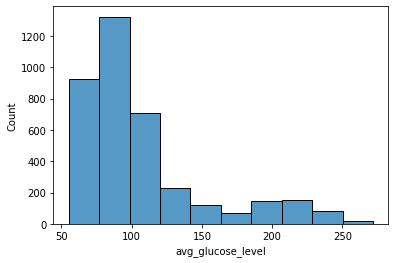

In [273]:
sns.histplot(data = df,
             x = df.avg_glucose_level, bins = 10)

In [274]:
gluc_mean = df.avg_glucose_level.describe().loc['mean']
gluc_mean

106.0551389256417

In [275]:
df[df.avg_glucose_level.isna()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
14,Female,54.0,0.0,0.0,Yes,Private,Urban,NaN,27.3,smokes,1
37,Female,82.0,1.0,0.0,No,Private,Rural,NaN,26.5,formerly smoked,1
46,Male,60.0,1.0,0.0,Yes,Govt_job,Urban,NaN,20.2,smokes,1
49,Female,58.0,0.0,0.0,Yes,Private,Urban,NaN,NaN,formerly smoked,1
58,Female,82.0,0.0,0.0,Yes,Private,Rural,NaN,33.2,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5000,Female,24.0,0.0,0.0,Yes,Private,Rural,NaN,NaN,never smoked,0
5046,Male,33.0,0.0,0.0,Yes,Govt_job,Rural,NaN,24.8,never smoked,0
5047,Female,44.0,0.0,0.0,Yes,Private,Rural,NaN,NaN,never smoked,0
5070,Male,80.0,0.0,0.0,Yes,Self-employed,Urban,NaN,24.3,formerly smoked,0


In [276]:
df.avg_glucose_level = df.avg_glucose_level.fillna(gluc_mean)
df[df.avg_glucose_level.isna()]

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


## bmi

In [277]:
df[df.bmi.isna()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,NaN,formerly smoked,1
3,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Male,74.0,1.0,1.0,Yes,Private,Rural,70.09,NaN,never smoked,1
10,Female,59.0,0.0,0.0,Yes,Private,Rural,76.15,NaN,Unknown,1
12,Female,81.0,1.0,0.0,Yes,Private,Rural,80.43,NaN,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5089,Female,63.0,0.0,0.0,Yes,Self-employed,Rural,75.93,NaN,formerly smoked,0
5095,Female,45.0,1.0,0.0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5101,Male,40.0,0.0,0.0,Yes,Private,Rural,83.94,NaN,smokes,0
5106,Female,13.0,0.0,0.0,No,children,Rural,103.08,NaN,Unknown,0


In [278]:
df.bmi = df.bmi.values.astype(float)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


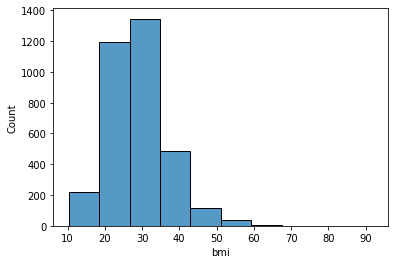

In [279]:
sns.histplot(data = df,
             x = df.bmi, bins = 10)

In [280]:
df.bmi.describe()

count    3404.000000
mean       28.897297
std         7.698757
min        10.300000
25%        23.600000
50%        28.000000
75%        33.000000
max        92.000000
Name: bmi, dtype: float64

In [281]:
df.bmi = df.bmi.fillna(df.bmi.describe().loc['mean'])

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [282]:
df[df.bmi.isna()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


## smoking_status

In [283]:
df.smoking_status.value_counts()

never smoked       1549
Unknown            1239
formerly smoked     726
smokes              666
Name: smoking_status, dtype: int64

In [284]:
df.smoking_status.isna().sum()

0

In [285]:
df[df.smoking_status.isna()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


NaN-ов нет, дропаем unknown

In [286]:
df = df.drop(df[df.smoking_status == 'Unknown'].index)
df.smoking_status.value_counts()

never smoked       1549
formerly smoked     726
smokes              666
Name: smoking_status, dtype: int64

##stroke

In [287]:
df.stroke.isna().sum()

0

In [288]:
df[df.stroke.isna()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


## Сохраняем очищенный dataframe

In [ ]:
df = df.reset_index(drop=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,28.897297,formerly smoked,1
1,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,28.897297,never smoked,1
2,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.400000,smokes,1
3,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
4,Male,81.0,0.0,0.0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
2936,Female,57.0,0.0,0.0,Yes,Private,Rural,77.93,21.700000,never smoked,0
2937,Female,80.0,1.0,0.0,Yes,Private,Urban,83.75,28.897297,never smoked,0
2938,Female,81.0,0.0,0.0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
2939,Female,35.0,0.0,0.0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0


In [ ]:
df.to_csv('strokes.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2941 entries, 0 to 2940
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             2941 non-null   object 
 1   age                2941 non-null   float64
 2   hypertension       2941 non-null   object 
 3   heart_disease      2941 non-null   object 
 4   ever_married       2941 non-null   object 
 5   work_type          2941 non-null   object 
 6   Residence_type     2941 non-null   object 
 7   avg_glucose_level  2941 non-null   float64
 8   bmi                2941 non-null   float64
 9   smoking_status     2941 non-null   object 
 10  stroke             2941 non-null   object 
dtypes: float64(3), object(8)
memory usage: 252.9+ KB


In [ ]:
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke'] 
 Число столблцов =  8
Числовые данные:	  ['age', 'avg_glucose_level', 'bmi'] 
 Число столблцов =  3


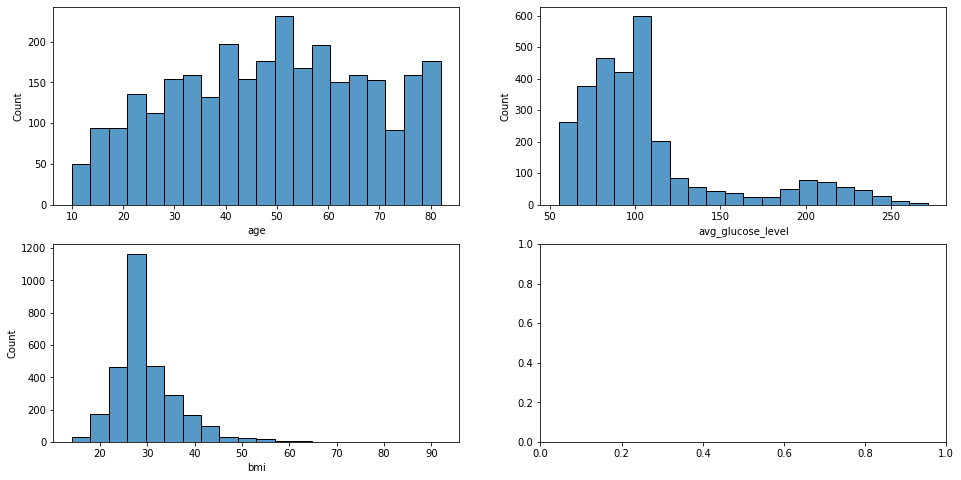

In [ ]:
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20);

In [219]:
df[df.work_type == 'children'].stroke.value_counts()

0    44
Name: stroke, dtype: int64

In [220]:
df = df.drop(df[df.work_type == 'children'].index)
df = df.reset_index(drop=True)


<Figure size 1080x1080 with 0 Axes>

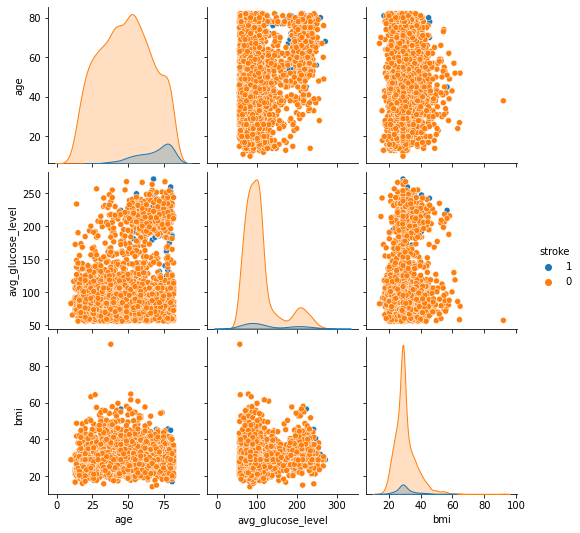

In [ ]:
fig = plt.figure(figsize=(15,15))
sns.pairplot(data = df, 
             hue ='stroke',
             );

In [221]:
bmi_q = df[df.bmi > 60]
bmi_q

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
164,Female,57.0,1.0,0.0,Yes,Private,Rural,129.54,60.9,smokes,0
209,Male,52.0,0.0,0.0,Yes,Self-employed,Urban,78.4,64.8,never smoked,0
1429,Female,24.0,0.0,0.0,Yes,Private,Urban,85.55,63.3,never smoked,0
1961,Female,52.0,0.0,0.0,Yes,Private,Rural,118.46,61.6,smokes,0
2156,Female,27.0,0.0,0.0,Yes,Private,Rural,57.96,64.4,never smoked,0
2164,Male,38.0,1.0,0.0,Yes,Private,Rural,56.9,92.0,never smoked,0


In [222]:
df = df.drop(bmi_q.index)
df = df.reset_index(drop=True)


<Figure size 1080x1080 with 0 Axes>

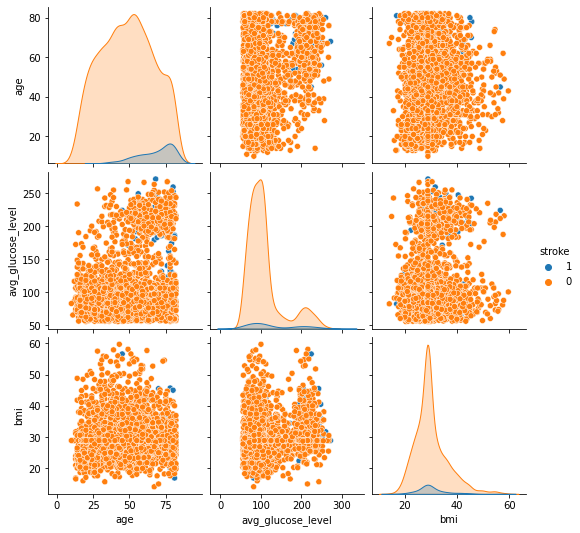

In [ ]:
fig = plt.figure(figsize=(15,15))
sns.pairplot(data = df, 
             hue ='stroke',
             );

<Figure size 1080x1080 with 0 Axes>

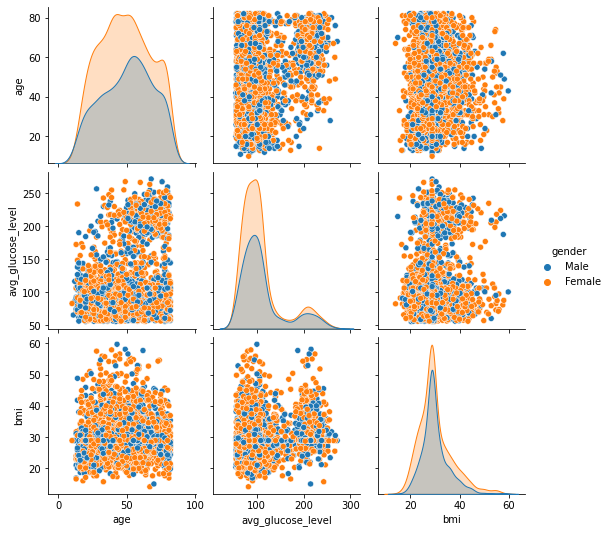

In [ ]:
fig = plt.figure(figsize=(15,15))
sns.pairplot(data = df, 
             hue ='gender',
             );

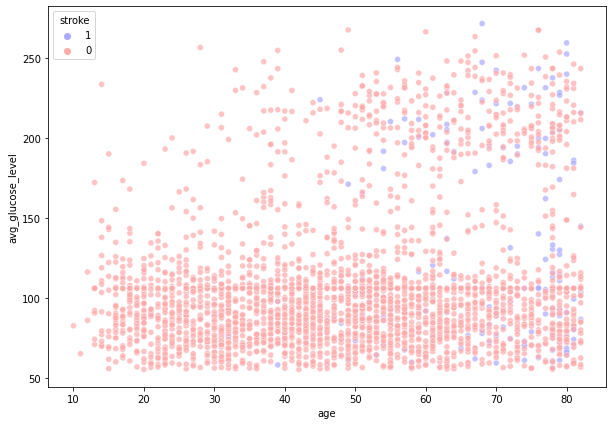

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(    
    data=df,
    x="age", y="avg_glucose_level",
    hue="stroke", 
    alpha = 0.7,
             palette='bwr'
    );

Из этого графика можно увидеть, что инсульты чаще встречаются у людей с большим возрастом и высоким содержанием глюкозы в крови

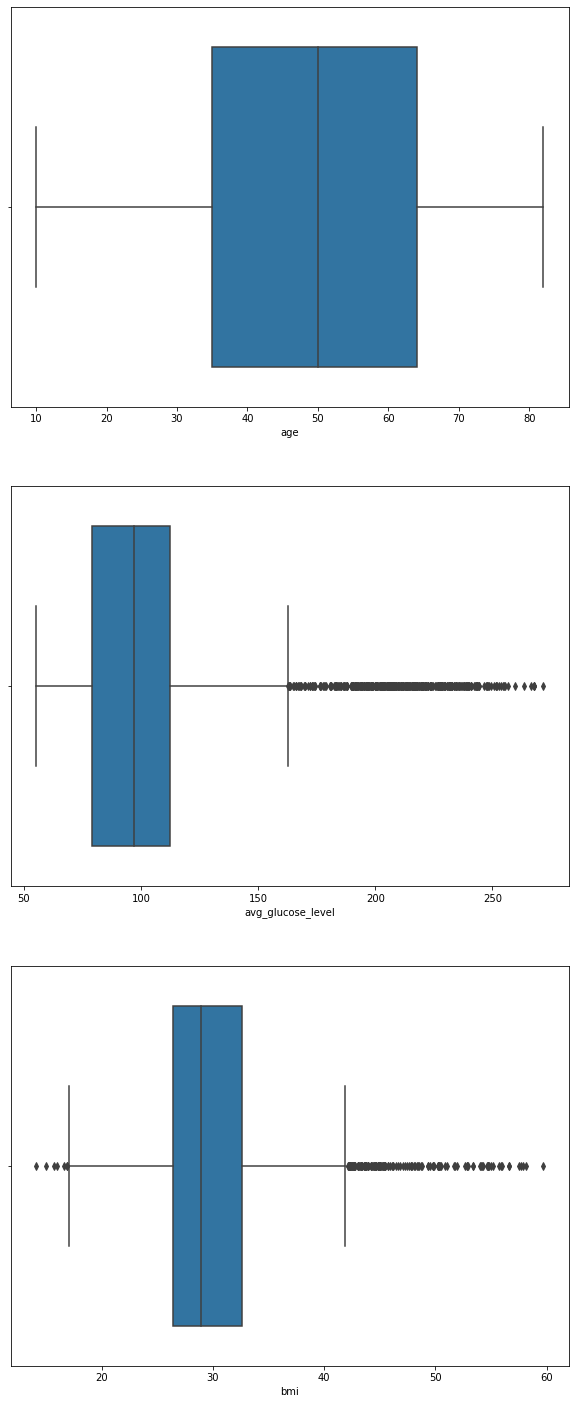

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,25))

for idx, column_name in enumerate(num_columns):

    plt.subplot(3,1, idx+1)
    sns.boxplot(data=df,
            x=column_name);

In [ ]:
cm = sns.color_palette("vlag", as_cmap=True)

df.corr().style.background_gradient(cmap=cm, vmin = -1, vmax=1)

,age,avg_glucose_level,bmi
age,1.000000,0.230000,0.040049
avg_glucose_level,0.230000,1.000000,0.132200
bmi,0.040049,0.132200,1.000000


Какое-то подобие зависимости наблюдается у возраста и уровня глюкозы в крови, но оно незначительно

## Приведение бинарных данных к числовым

In [ ]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['hypertension'] = df['hypertension'].map({'1.0': 1, '0.0': 0})
df['heart_disease'] = df['heart_disease'].map({'1.0': 1, '0.0': 0})
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})


In [ ]:
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['work_type', 'Residence_type', 'smoking_status', 'stroke'] 
 Число столблцов =  4
Числовые данные:	  ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'bmi'] 
 Число столблцов =  7


In [ ]:
df['stroke'] = df['stroke'].map({'Yes': 1, 'No': 0})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})

In [ ]:
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['work_type', 'smoking_status'] 
 Число столблцов =  2
Числовые данные:	  ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke'] 
 Число столблцов =  9


## Приведение категориальных данных к числовым

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

In [ ]:
encoder = OrdinalEncoder()
or_series = df[['work_type', "smoking_status"]]
data = pd.DataFrame(encoder.fit_transform(or_series), columns=or_series.columns)
data

,work_type,smoking_status
0,2.0,0.0
1,3.0,1.0
2,2.0,2.0
3,3.0,1.0
4,2.0,0.0
...,...,...
2878,2.0,1.0
2879,2.0,1.0
2880,3.0,1.0
2881,3.0,1.0


In [ ]:
df.work_type = data.work_type
df.smoking_status = data.smoking_status
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2.0,1,228.69,28.897297,0.0,-9223372036854775808
1,0,61.0,0,0,1,3.0,0,202.21,28.897297,1.0,-9223372036854775808
2,0,49.0,0,0,1,2.0,1,171.23,34.400000,2.0,-9223372036854775808
3,0,79.0,1,0,1,3.0,0,174.12,24.000000,1.0,-9223372036854775808
4,1,81.0,0,0,1,2.0,1,186.21,29.000000,0.0,-9223372036854775808
...,...,...,...,...,...,...,...,...,...,...,...
2878,0,57.0,0,0,1,2.0,0,77.93,21.700000,1.0,-9223372036854775808
2879,0,80.0,1,0,1,2.0,1,83.75,28.897297,1.0,-9223372036854775808
2880,0,81.0,0,0,1,3.0,1,125.20,40.000000,1.0,-9223372036854775808
2881,0,35.0,0,0,1,3.0,0,82.99,30.600000,1.0,-9223372036854775808


In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,49.0,0,0,1,2.0,1,171.23,34.400000,2.0,1
1,0,79.0,1,0,1,3.0,0,174.12,24.000000,1.0,1
2,1,81.0,0,0,1,2.0,1,186.21,29.000000,0.0,1
3,1,74.0,1,1,1,2.0,0,70.09,28.897297,1.0,1
4,0,69.0,0,0,0,2.0,1,94.39,22.800000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2876,0,57.0,0,0,1,2.0,0,77.93,21.700000,1.0,0
2877,0,80.0,1,0,1,2.0,1,83.75,28.897297,1.0,0
2878,0,81.0,0,0,1,3.0,1,125.20,40.000000,1.0,0
2879,0,35.0,0,0,1,3.0,0,82.99,30.600000,1.0,0


In [ ]:
df['stroke'] = df['stroke'].values.astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             2881 non-null   int64  
 1   age                2881 non-null   float64
 2   hypertension       2881 non-null   int64  
 3   heart_disease      2881 non-null   int64  
 4   ever_married       2881 non-null   int64  
 5   work_type          2881 non-null   float64
 6   Residence_type     2881 non-null   int64  
 7   avg_glucose_level  2881 non-null   float64
 8   bmi                2881 non-null   float64
 9   smoking_status     2881 non-null   float64
 10  stroke             2881 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 247.7 KB


Все типы сведены к числовым, можно подавать на обучение

In [ ]:
df.to_csv('df_for_ml.csv')

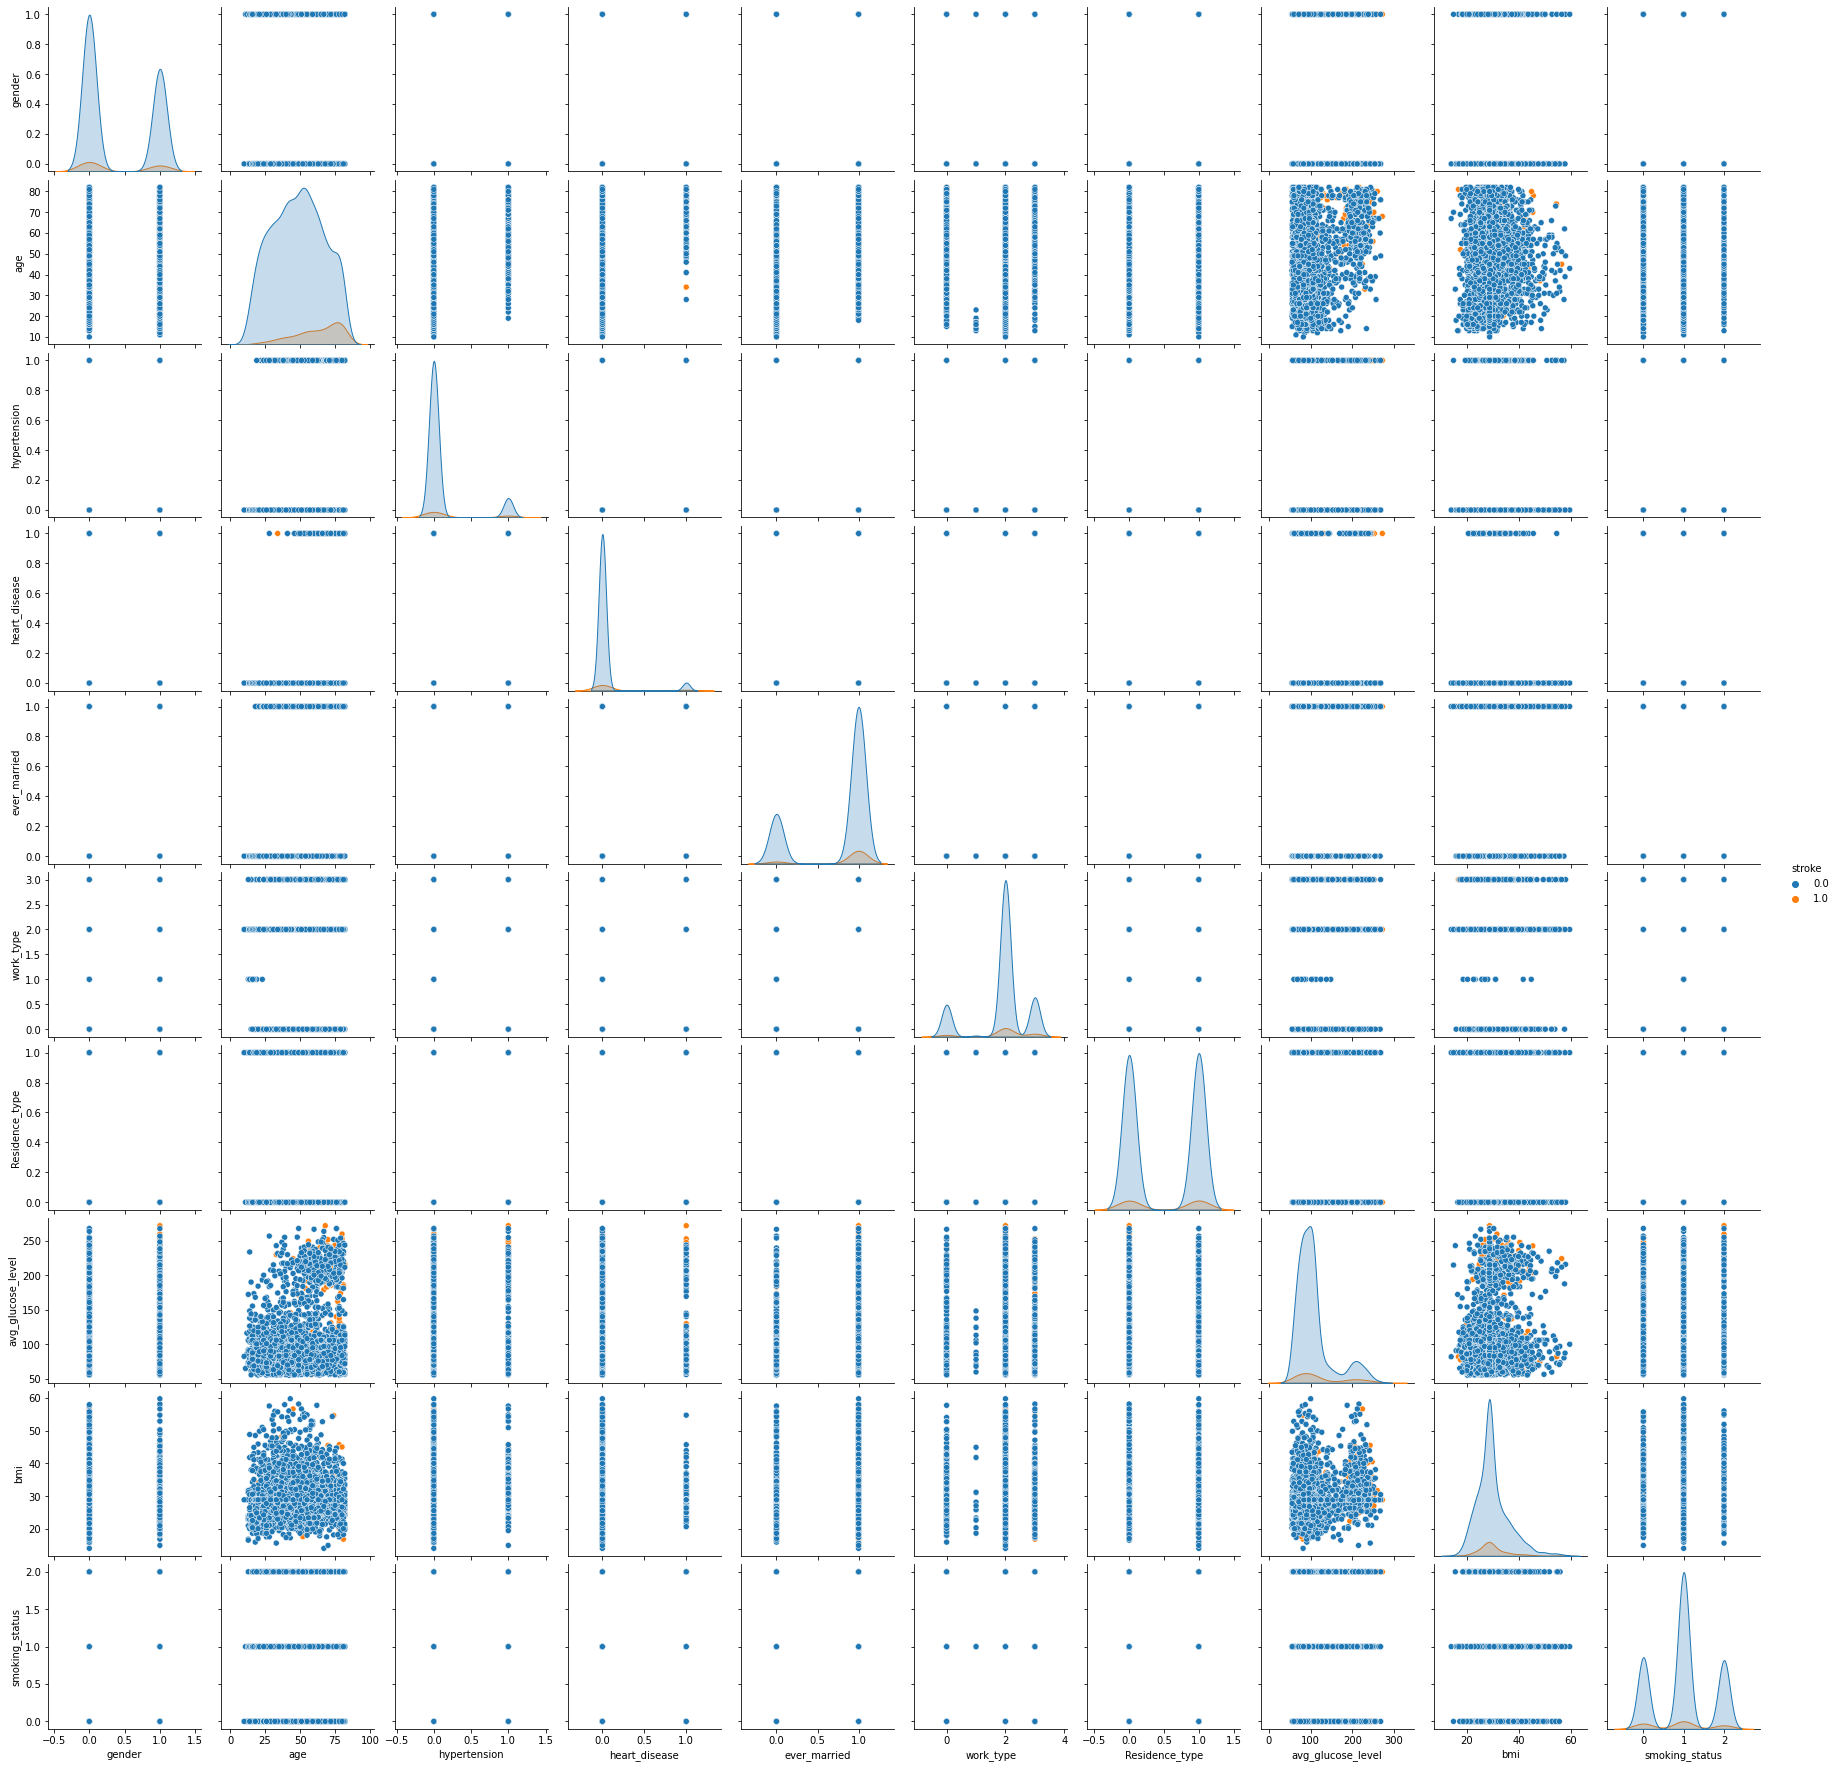

In [ ]:
sns.pairplot(data = df, hue ='stroke');

## МО

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,49.0,0,0,1,2.0,1,171.23,34.400000,2.0,1
1,0,79.0,1,0,1,3.0,0,174.12,24.000000,1.0,1
2,1,81.0,0,0,1,2.0,1,186.21,29.000000,0.0,1
3,1,74.0,1,1,1,2.0,0,70.09,28.897297,1.0,1
4,0,69.0,0,0,0,2.0,1,94.39,22.800000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2876,0,57.0,0,0,1,2.0,0,77.93,21.700000,1.0,0
2877,0,80.0,1,0,1,2.0,1,83.75,28.897297,1.0,0
2878,0,81.0,0,0,1,3.0,1,125.20,40.000000,1.0,0
2879,0,35.0,0,0,1,3.0,0,82.99,30.600000,1.0,0


In [ ]:
df.stroke.value_counts()

0    2632
1     249
Name: stroke, dtype: int64

Обнаруживаем сильную несбалансированность классов

## Балансировка классов

In [229]:
!pip install imbalanced-learn
!pip install imblearn
from imblearn.over_sampling import SMOTE , ADASYN
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from collections import Counter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [232]:
y = df.iloc[:, -1]
df, y = ADASYN().fit_resample(df, y)
df.stroke.value_counts()

ValueError: ignored

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,49.000000,0,0,1,2.000000,1,171.230000,34.400000,2.000000,1
1,0,79.000000,1,0,1,3.000000,0,174.120000,24.000000,1.000000,1
2,1,81.000000,0,0,1,2.000000,1,186.210000,29.000000,0.000000,1
3,1,74.000000,1,1,1,2.000000,0,70.090000,28.897297,1.000000,1
4,0,69.000000,0,0,0,2.000000,1,94.390000,22.800000,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
5200,1,58.775083,0,0,1,1.510033,0,93.262509,38.031356,1.510033,1
5201,0,55.252498,0,0,1,0.504995,0,99.585402,43.539510,0.000000,1
5202,0,55.343825,0,0,1,0.687650,0,100.375855,43.155934,0.000000,1
5203,1,51.799111,0,0,1,0.800222,0,93.214838,43.199611,0.000000,1


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

## KNN

In [ ]:
X = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level','bmi','smoking_status']]
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 77, test_size=0.25)

In [ ]:
knn_params = {"n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], "weights": ["uniform", "distance"], 
              "metric": ["euclidean", "cityblock", "manhattan", "nan_euclidean", "cosine", "l1", "l2"]}
neigh = KNeighborsClassifier()
grid_knn_clf = GridSearchCV(neigh, knn_params, error_score='raise')
grid_knn_clf.fit(X_train, y_train)

GridSearchCV(error_score='raise', estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'cityblock', 'manhattan',
                                    'nan_euclidean', 'cosine', 'l1', 'l2'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'weights': ['uniform', 'distance']})

In [ ]:
pred_grid = grid_knn_clf.predict(X_test)
f_1_grid = f1_score(y_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
precision_grid = precision_score(y_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
recall_grid = recall_score(y_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
accuracy_grid = accuracy_score(y_test, pred_grid)
print('Значение F1 = {}, значение precision = {}, значение recall = {}, значение accuracy = {}'.format(round(f_1_grid, 3), 
                                                                                                       round(precision_grid, 3), 
                                                                                                       round(recall_grid, 3), 
                                                                                                       round(accuracy_grid, 3)))

Значение F1 = 0.877, значение precision = 0.881, значение recall = 0.877, значение accuracy = 0.877


## randomforest

In [ ]:
forest_params = {"n_estimators": [75, 100, 110], "criterion": ["gini", "entropy"], 
              "max_depth": [2, 3, 4], "min_samples_split": [2, 3, 4]}
random_forest = RandomForestClassifier(random_state=42)
grid_forest_clf = GridSearchCV(random_forest, forest_params, error_score='raise')
grid_forest_clf.fit(X_train, y_train)

GridSearchCV(error_score='raise',
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4], 'min_samples_split': [2, 3, 4],
                         'n_estimators': [75, 100, 110]})

In [ ]:
pred_grid = grid_forest_clf.predict(X_test)
f_1_grid = f1_score(y_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
precision_grid = precision_score(y_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
recall_grid = recall_score(y_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
accuracy_grid = accuracy_score(y_test, pred_grid)
print('Значение F1 = {}, значение precision = {}, значение recall = {}, значение accuracy = {}'.format(round(f_1_grid, 3), 
                                                                                                       round(precision_grid, 3), 
                                                                                                       round(recall_grid, 3), 
                                                                                                       round(accuracy_grid, 3)))

Значение F1 = 0.808, значение precision = 0.808, значение recall = 0.808, значение accuracy = 0.808


## ADABOOST

In [ ]:
ada_params = {"n_estimators": [25, 50, 75, 100], "learning_rate": [0.01, 0.1, 0.5, 1], 
              "algorithm": ["SAMME", "SAMME.R"]}
ada = AdaBoostClassifier(random_state=42)
grid_ada_clf = GridSearchCV(ada, ada_params, error_score='raise')
grid_ada_clf.fit(X_train, y_train)

GridSearchCV(error_score='raise', estimator=AdaBoostClassifier(random_state=42),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'n_estimators': [25, 50, 75, 100]})

In [ ]:
pred_grid = grid_ada_clf.predict(X_test)
f_1_grid = f1_score(y_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
precision_grid = precision_score(y_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
recall_grid = recall_score(y_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
accuracy_grid = accuracy_score(y_test, pred_grid)
print('Значение F1 = {}, значение precision = {}, значение recall = {}, значение accuracy = {}'.format(round(f_1_grid, 3), 
                                                                                                       round(precision_grid, 3), 
                                                                                                       round(recall_grid, 3), 
                                                                                                       round(accuracy_grid, 3)))

Значение F1 = 0.878, значение precision = 0.881, значение recall = 0.879, значение accuracy = 0.879


##GRADBOOST

In [ ]:
grad_params = {"loss": ["deviance", "exponential"], "learning_rate": [0.01, 0.1, 0.5, 1], 
              "n_estimators": [75, 100, 150], "criterion": ["friedman_mse", "squared_error"], "max_depth": [3, 4, 5]}
grad = GradientBoostingClassifier(random_state=42, n_iter_no_change=50)
grid_grad_clf = GridSearchCV(grad, grad_params, error_score='raise')
grid_grad_clf.fit(X_train, y_train)

GridSearchCV(error_score='raise',
             estimator=GradientBoostingClassifier(n_iter_no_change=50,
                                                  random_state=42),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [75, 100, 150]})

In [ ]:
pred_grid = grid_grad_clf.predict(X_test)
f_1_grid = f1_score(y_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
precision_grid = precision_score(y_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
recall_grid = recall_score(y_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
accuracy_grid = accuracy_score(y_test, pred_grid)
print('Значение F1 = {}, значение precision = {}, значение recall = {}, значение accuracy = {}'.format(round(f_1_grid, 3), 
                                                                                                       round(precision_grid, 3), 
                                                                                                       round(recall_grid, 3), 
                                                                                                       round(accuracy_grid, 3)))

Значение F1 = 0.924, значение precision = 0.924, значение recall = 0.924, значение accuracy = 0.924


## XGBOOST

In [ ]:
import xgboost as xgb

In [ ]:
xgb_params = {"learning_rate": [0.01, 0.1, 0.5, 1], 
              "n_estimators": [75, 100, 150], "max_depth": [3, 4, 5]}
xgb = xgb.XGBClassifier(random_state=42)
grid_xgb_clf = GridSearchCV(xgb, xgb_params, error_score='raise')
grid_xgb_clf.fit(X_train, y_train)

GridSearchCV(error_score='raise', estimator=XGBClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [75, 100, 150]})

In [ ]:
pred_grid = grid_xgb_clf.predict(X_test)
f_1_grid = f1_score(y_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
precision_grid = precision_score(y_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
recall_grid = recall_score(y_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
accuracy_grid = accuracy_score(y_test, pred_grid)
print('Значение F1 = {}, значение precision = {}, значение recall = {}, значение accuracy = {}'.format(round(f_1_grid, 3), 
                                                                                                       round(precision_grid, 3), 
                                                                                                       round(recall_grid, 3), 
                                                                                                       round(accuracy_grid, 3)))

Значение F1 = 0.93, значение precision = 0.93, значение recall = 0.93, значение accuracy = 0.93


## CatBOOST

In [ ]:
!pip install hpsklearn
!pip install optuna
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 7.1 MB/s 
  Created wheel for hpsklearn: filename=hpsklearn-0.1.0-py3-none-any.whl size=23913 sha256=3df5dcf4a3148b39532e2ad1bc05437a34a9f901ee531a85cb4d63aaab5dece8
  Stored in directory: /root/.cache/pip/wheels/b2/22/23/9207fbe861f70774b563f909a415b228450bfcf863c64ac1e8
Successfully built hpsklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 5.1 MB/s 
     |████████████████████████████████| 209 kB 41.0 MB/s 
     |████████████████████████████████| 81 kB 8.4 MB/s 
     |████████████████████████████████| 78 kB 6.3 MB/s 
     |████████████████████████████████| 50 kB 4.9 MB/s 
     |████████████████████████████████| 112 kB 45.2 MB/s 
     |████████████████████████████████| 147 kB 48.0 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.

In [ ]:
from hpsklearn import HyperoptEstimator
import optuna
from catboost import CatBoostClassifier

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [ ]:
estim = HyperoptEstimator(max_evals=8, seed=42)

estim.fit(X_train.values, y_train.values)

score = estim.score(X_test, y_test)

100%|██████████| 1/1 [00:00<00:00,  2.52it/s, best loss: 0.11011523687580027]


In [ ]:
print('Accuracy лучшей модели, найденной HyperOpt: ', score)
print()
print('Лучшая модель и её параметры: ', estim.best_model())

Accuracy лучшей модели, найденной HyperOpt:  0.8187403993855606

Лучшая модель и её параметры:  {'learner': RandomForestClassifier(bootstrap=False, max_features=0.3021556882054133,
                       min_samples_leaf=2, n_estimators=115, n_jobs=1,
                       random_state=4, verbose=False), 'preprocs': (PCA(n_components=10, whiten=True),), 'ex_preprocs': ()}


In [ ]:
def objective_forest(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500), 
        'random_state': 42,
        'criterion': trial.suggest_categorical('boosting_type', ['gini', 'entropy']),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_depth': trial.suggest_categorical('max_depth', [5, 10, 15, 20, 25, 50]),
        'min_samples_split' : trial.suggest_int('min_samples_split', 2, 15),
        'max_features' : trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
        'class_weight' : trial.suggest_categorical('class_weight', ['balanced', None])
    }
    model = RandomForestClassifier(**param)  
    
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    
    acc = accuracy_score(y_test, preds)
    
    return acc

In [ ]:
SEED = 42
np.random.seed(SEED)

In [ ]:
study_forest = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=SEED))
study_forest.optimize(objective_forest, n_trials=200)

[I 2022-10-19 15:37:49,170] A new study created in memory with name: no-name-cd840b92-aa2e-405a-a788-3cdc8e249e39
[I 2022-10-19 15:37:50,462] Trial 0 finished with value: 0.9170506912442397 and parameters: {'n_estimators': 250, 'boosting_type': 'gini', 'min_samples_leaf': 6, 'max_depth': 20, 'min_samples_split': 2, 'max_features': 'auto', 'class_weight': None}. Best is trial 0 with value: 0.9170506912442397.
[I 2022-10-19 15:37:51,598] Trial 1 finished with value: 0.9231950844854071 and parameters: {'n_estimators': 222, 'boosting_type': 'gini', 'min_samples_leaf': 3, 'max_depth': 50, 'min_samples_split': 4, 'max_features': 'sqrt', 'class_weight': 'balanced'}. Best is trial 1 with value: 0.9231950844854071.
[I 2022-10-19 15:37:52,410] Trial 2 finished with value: 0.9032258064516129 and parameters: {'n_estimators': 126, 'boosting_type': 'entropy', 'min_samples_leaf': 9, 'max_depth': 15, 'min_samples_split': 2, 'max_features': 'auto', 'class_weight': None}. Best is trial 1 with value: 0.9

In [ ]:
print('Число завершенных оценок:', len(study_forest.trials))
print('Параметры, полученные при лучшей оценке:', study_forest.best_trial.params)

Число завершенных оценок: 200
Параметры, полученные при лучшей оценке: {'n_estimators': 473, 'boosting_type': 'entropy', 'min_samples_leaf': 1, 'max_depth': 25, 'min_samples_split': 5, 'max_features': 'log2', 'class_weight': 'balanced'}


In [ ]:
forest_study = study_forest.trials_dataframe()
best_accuracy_forest = (
    forest_study.sort_values(by='value', ascending=False).reset_index(drop=True)[['value', 
                                                                                'params_n_estimators', 
                                                                               'params_boosting_type',
                                                                               'params_min_samples_leaf',
                                                                               'params_max_depth',
                                                                               'params_min_samples_split',
                                                                               'params_max_features',
                                                                               'params_class_weight']]
)
best_accuracy_forest = best_accuracy_forest.rename(columns={'value': 'accuracy'}).iloc[[0], :]
best_accuracy_forest

,accuracy,params_n_estimators,params_boosting_type,params_min_samples_leaf,params_max_depth,params_min_samples_split,params_max_features,params_class_weight
0,0.939324,474,entropy,1,25,5,log2,balanced


## CAT

In [ ]:
def objective_cat(trial):
    param = {
        'iterations': trial.suggest_categorical('iterations', [500, 1000, 300, 800]), 
        'verbose': 0, # Не показывать вывод от итераций
        'random_seed': 42,
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 7),
        # trial.suggest_categorical повзоляет выбирать значения из переданного списка, так же ещё есть:
        # trial.suggest_int пример: min_samples_split = trial.suggest_int('min_samples_split', 2, 20);
        # trial.suggest_float пример: x = trial.suggest_float("x", 0, 5);
        # trial.suggest_uniform пример: regularization = trial.suggest_uniform('logistic-regularization', 0.01, 10)
        'learning_rate': trial.suggest_categorical('learning_rate', [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]),
        'max_depth': trial.suggest_categorical('max_depth', [2, 3, 4, 5, 6, 7, 8, 9, 10])
    }
    model = CatBoostClassifier(**param)  
    
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    
    acc = accuracy_score(y_test, preds)
    
    return acc

In [ ]:
study_cat = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=SEED))
study_cat.optimize(objective_cat, n_trials=200)

[I 2022-10-19 15:53:20,908] A new study created in memory with name: no-name-cae68626-f66e-4cdc-ad1b-333486b83823
[I 2022-10-19 15:53:23,816] Trial 0 finished with value: 0.9262672811059908 and parameters: {'iterations': 1000, 'l2_leaf_reg': 1.936111842654619, 'learning_rate': 0.3, 'max_depth': 2}. Best is trial 0 with value: 0.9262672811059908.
[I 2022-10-19 15:53:25,576] Trial 1 finished with value: 0.9247311827956989 and parameters: {'iterations': 800, 'l2_leaf_reg': 5.711055768358081, 'learning_rate': 0.2, 'max_depth': 3}. Best is trial 0 with value: 0.9262672811059908.
[I 2022-10-19 15:53:27,522] Trial 2 finished with value: 0.9270353302611367 and parameters: {'iterations': 1000, 'l2_leaf_reg': 2.8702664565364655, 'learning_rate': 0.15, 'max_depth': 3}. Best is trial 2 with value: 0.9270353302611367.
[I 2022-10-19 15:53:28,874] Trial 3 finished with value: 0.9224270353302612 and parameters: {'iterations': 300, 'l2_leaf_reg': 5.813181884524238, 'learning_rate': 0.05, 'max_depth': 7

In [ ]:
cat_study = study_cat.trials_dataframe()
best_accuracy_cat = (
    cat_study.sort_values(by='value', ascending=False).reset_index(drop=True)[['value',
                                                                               'params_iterations',
                                                                               'params_l2_leaf_reg',
                                                                                'params_learning_rate', 
                                                                               'params_max_depth']]
)
best_accuracy_cat = best_accuracy_cat.rename(columns={'value': 'accuracy'}).iloc[[0], :]
best_accuracy_cat

,accuracy,params_iterations,params_l2_leaf_reg,params_learning_rate,params_max_depth
0,0.942396,300,3.582712,0.1,9


0.942396	 !!!!!!!!1 кто больше?

## Мини исследование о вреде курения

In [293]:
test = df2.copy()

In [289]:
df2 = df.copy()
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,28.897297,formerly smoked,1
3,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,28.897297,never smoked,1
5,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.400000,smokes,1
6,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
7,Male,81.0,0.0,0.0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,57.0,0.0,0.0,Yes,Private,Rural,77.93,21.700000,never smoked,0
5107,Female,80.0,1.0,0.0,Yes,Private,Urban,83.75,28.897297,never smoked,0
5108,Female,81.0,0.0,0.0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5109,Female,35.0,0.0,0.0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0


In [295]:
df2.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes'], dtype=object)

In [296]:
df2['gender'] = df2['gender'].map({'Male': 1, 'Female': 0})
df2['hypertension'] = df2['hypertension'].map({'1.0': 1, '0.0': 0})
df2['heart_disease'] = df2['heart_disease'].map({'1.0': 1, '0.0': 0})
df2['ever_married'] = df2['ever_married'].map({'Yes': 1, 'No': 0})
df2['work_type'] = df2['work_type'].map({'Private': 0, 'Self-employed': 1,'Govt_job': 2,'Never_worked': 3})
df2['Residence_type'] = df2['Residence_type'].map({'Urban': 0, 'Rural': 1})
df2['smoking_status'] = df2['smoking_status'].map({'formerly smoked': 0, 'never smoked': 1, 'smokes' : 2})

In [297]:
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,0,228.69,28.897297,0,1
1,0,61.0,0,0,1,1,1,202.21,28.897297,1,1
2,0,49.0,0,0,1,0,0,171.23,34.400000,2,1
3,0,79.0,1,0,1,1,1,174.12,24.000000,1,1
4,1,81.0,0,0,1,0,0,186.21,29.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2878,0,57.0,0,0,1,0,1,77.93,21.700000,1,0
2879,0,80.0,1,0,1,0,0,83.75,28.897297,1,0
2880,0,81.0,0,0,1,1,0,125.20,40.000000,1,0
2881,0,35.0,0,0,1,1,1,82.99,30.600000,1,0


In [298]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2883 entries, 0 to 2882
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             2883 non-null   int64  
 1   age                2883 non-null   float64
 2   hypertension       2883 non-null   int64  
 3   heart_disease      2883 non-null   int64  
 4   ever_married       2883 non-null   int64  
 5   work_type          2883 non-null   int64  
 6   Residence_type     2883 non-null   int64  
 7   avg_glucose_level  2883 non-null   float64
 8   bmi                2883 non-null   float64
 9   smoking_status     2883 non-null   int64  
 10  stroke             2883 non-null   object 
dtypes: float64(3), int64(7), object(1)
memory usage: 247.9+ KB


In [299]:
df2.stroke = df2.stroke.values.astype(int)

In [300]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2883 entries, 0 to 2882
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             2883 non-null   int64  
 1   age                2883 non-null   float64
 2   hypertension       2883 non-null   int64  
 3   heart_disease      2883 non-null   int64  
 4   ever_married       2883 non-null   int64  
 5   work_type          2883 non-null   int64  
 6   Residence_type     2883 non-null   int64  
 7   avg_glucose_level  2883 non-null   float64
 8   bmi                2883 non-null   float64
 9   smoking_status     2883 non-null   int64  
 10  stroke             2883 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 247.9 KB


In [302]:
y = df2.iloc[:, -1]
df2, y = ADASYN().fit_resample(df2, y)
df2.stroke.value_counts()

1    2734
0    2714
Name: stroke, dtype: int64

In [303]:
test = df2.copy()

In [304]:
df2['gender'] = df2['gender'].map({ 1: 'Male', 0: 'Female'})
df2['hypertension'] = df2['hypertension'].map({ 1 : '1.0', 0: '0.0'})
df2['heart_disease'] = df2['heart_disease'].map({1 : '1.0', 0: '0.0'})
df2['ever_married'] = df2['ever_married'].map({1: 'Yes', 0: 'No'})
df2['work_type'] = df2['work_type'].map({0: 'Private', 1: 'Self-employed',2: 'Govt_job',3: 'Never_worked'})
df2['Residence_type'] = df2['Residence_type'].map({0: 'Urban', 1: 'Rural'})
df2['smoking_status'] = df2['smoking_status'].map({0: 'formerly smoked', 1: 'never smoked', 2 : 'smokes'})

In [305]:
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.000000,0.0,1.0,Yes,Private,Urban,228.690000,28.897297,formerly smoked,1
1,Female,61.000000,0.0,0.0,Yes,Self-employed,Rural,202.210000,28.897297,never smoked,1
2,Female,49.000000,0.0,0.0,Yes,Private,Urban,171.230000,34.400000,smokes,1
3,Female,79.000000,1.0,0.0,Yes,Self-employed,Rural,174.120000,24.000000,never smoked,1
4,Male,81.000000,0.0,0.0,Yes,Private,Urban,186.210000,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5443,Female,70.735106,0.0,0.0,Yes,Self-employed,Rural,76.701672,28.956503,formerly smoked,1
5444,Female,75.940527,0.0,0.0,Yes,Private,Urban,77.708989,29.173749,formerly smoked,1
5445,Female,77.420372,0.0,0.0,Yes,Private,Rural,76.512748,29.056327,formerly smoked,1
5446,Female,73.018753,0.0,0.0,Yes,Self-employed,Rural,77.825226,29.140429,formerly smoked,1


In [306]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5448 entries, 0 to 5447
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5448 non-null   object 
 1   age                5448 non-null   float64
 2   hypertension       5448 non-null   object 
 3   heart_disease      5448 non-null   object 
 4   ever_married       5448 non-null   object 
 5   work_type          5448 non-null   object 
 6   Residence_type     5448 non-null   object 
 7   avg_glucose_level  5448 non-null   float64
 8   bmi                5448 non-null   float64
 9   smoking_status     5448 non-null   object 
 10  stroke             5448 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 468.3+ KB


In [322]:
df_res = df2.groupby(['stroke', 'gender']).count().reset_index()

AttributeError: ignored

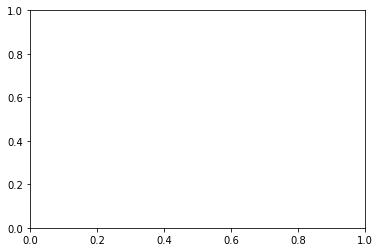

In [326]:
sns.barplot(x = 'avg_glucose_level', y = 'smoking_status', hue='gender', data = df_res, errorbar=None)

У меня не хватает скиллов в визуализации, мучился час, организм дальше сопротивляется, буду анализировать по таблицам

In [321]:
df2.groupby(['stroke']).mean()

,age,avg_glucose_level,bmi
stroke,,,
0,48.331245,107.447849,30.151816
1,67.707359,128.050683,29.958792


Из этой таблицы видно, что средний возраст инсульта 67 лет

In [327]:
df2.groupby(['stroke','smoking_status']).mean()

age  avg_glucose_level        bmi
stroke smoking_status                                          
0      formerly smoked  54.342988         110.265889  30.404425
       never smoked     46.579720         106.335080  30.037494
       smokes           46.039809         107.038016  30.148266
1      formerly smoked  68.477017         129.672220  30.241824
       never smoked     67.672680         124.387001  29.762154
       smokes           61.773648         138.695686  28.962134

У курящих и перенесших инсульт наблюдается высокий уровень глюкозы и индекс массы тела ниже среднего

In [328]:
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.000000,0.0,1.0,Yes,Private,Urban,228.690000,28.897297,formerly smoked,1
1,Female,61.000000,0.0,0.0,Yes,Self-employed,Rural,202.210000,28.897297,never smoked,1
2,Female,49.000000,0.0,0.0,Yes,Private,Urban,171.230000,34.400000,smokes,1
3,Female,79.000000,1.0,0.0,Yes,Self-employed,Rural,174.120000,24.000000,never smoked,1
4,Male,81.000000,0.0,0.0,Yes,Private,Urban,186.210000,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5443,Female,70.735106,0.0,0.0,Yes,Self-employed,Rural,76.701672,28.956503,formerly smoked,1
5444,Female,75.940527,0.0,0.0,Yes,Private,Urban,77.708989,29.173749,formerly smoked,1
5445,Female,77.420372,0.0,0.0,Yes,Private,Rural,76.512748,29.056327,formerly smoked,1
5446,Female,73.018753,0.0,0.0,Yes,Self-employed,Rural,77.825226,29.140429,formerly smoked,1


In [339]:
df_male = df2[(df2.gender == 'Male') & (df2.stroke == 1)].mode()
df_male

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0.0,0.0,Yes,Private,Urban,106.055139,28.897297,formerly smoked,1


Видно что замужние мужчины чаще курят

In [346]:
df2.groupby(['smoking_status','gender']).mean()

age  avg_glucose_level        bmi    stroke
smoking_status  gender                                                   
formerly smoked Female  64.013668         118.345852  30.271935  0.253397
                Male    63.973894         136.241988  30.345727  0.471667
never smoked    Female  57.087378         113.964875  29.833892  0.490890
                Male    52.905648         115.356420  30.130769  0.729078
smokes          Female  48.999587         113.261783  30.021097  0.739754
                Male    50.268572         115.133314  29.681745  0.842271

Видно что курящие мужчины чаще сталкиваются с инсультом чем курящие женщины